# Swan Consulting: EDA - Group 2

## Importing Data and Packages

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

In [85]:
df = pd.read_excel('customer_churn.xlsx')

## General EDA - Overview of the Data

In [86]:
# checking the datatypes

df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [87]:
# Change the types into something workable for analysis
# df['Total Charges'] = df['Total Charges'].astype(float)
# This will error!

In [88]:
# We see from the error that we have some values that are an empty string.
# Find the frequency of empty strings
df['Total Charges'].value_counts()

20.2      11
          11
19.75      9
19.65      8
20.05      8
          ..
444.75     1
5459.2     1
295.95     1
394.1      1
6844.5     1
Name: Total Charges, Length: 6531, dtype: int64

In [89]:
len(df)

7043

In [90]:
# As we have 11 values missing, so we choose to drop them.
df = df.loc[df['Total Charges'] != ' ']

In [91]:
len(df)

7032

In [92]:
# Now we can convert the column to float.
df['Total Charges'] = df['Total Charges'].astype(float)

In [93]:
# This may give a warning however we can see that it did in-fact change the type to float. This is a known false positive.
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [94]:
# Basic data exploration - rows x columns

df.shape

(7032, 31)

In [95]:
# Basic data exploration - top 5 rows

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,Competitor had better devices


In [96]:
# Basic data exploration - bottom 5 rows

df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No,0,NaN


In [97]:
# Checking for nulls - we only have nulls in churn reason, 5874 nulls

df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5163
dtype: int64

In [98]:
# Checking datatypes of each column

df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [99]:
# Checking the nulls and datatypes together

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   int64  
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 

In [100]:
# No churn reason provided (null) if a person has not churned

df[(df['Churn Reason'].isnull()) & (df['Churn Label'] == 'No')]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,...,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN


In [101]:
# Same number of rows where churn value is 1 and churn label is yes

len(df[df['Churn Value'] == 1])

1869

In [102]:
# Same number of rows where churn value is 1 and churn label is yes

len(df[df['Churn Label'] == 'Yes'])

1869

In [103]:
# How many customers churned vs did not churn

df['Churn Label'].value_counts()

No     5163
Yes    1869
Name: Churn Label, dtype: int64

Text(0.5, 1.02, 'Count of Churners and Non Churners')

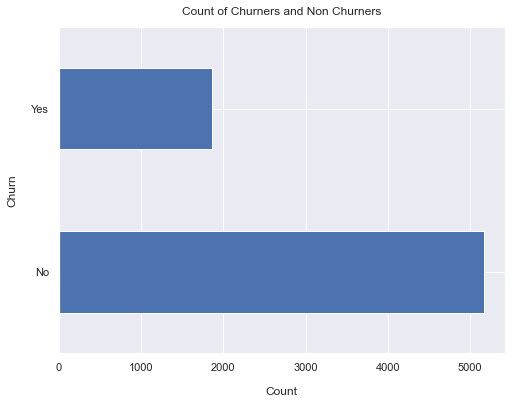

In [104]:
# Plot of churners and non churners count

df["Churn Label"].value_counts().plot(kind = 'barh',figsize = (8, 6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Churn", labelpad=14)
plt.title("Count of Churners and Non Churners",y =1.02)

In [105]:
# Name of columns

df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [106]:
# See unique values in all columns from left to right

cols = df.columns
for col in cols:
    print(df[col].unique())

['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
[1]
['United States']
['California']
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']
[90003 90005 90006 ... 96134 96146 95569]
['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '41.813521, -121.492666' '39.191797, -120.212401'
 '40.363446, -123.835041']
[33.964131 34.059281 34.048013 ... 41.813521 39.191797 40.363446]
[-118.272783 -118.30742  -118.293953 ... -121.492666 -120.212401
 -123.835041]
['Male' 'Female']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72]
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No inter

In [107]:
# Count number of unique values in each column

df.nunique()

CustomerID           7032
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          72
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1584
Total Charges        6530
Churn Label             2
Churn Value             2
Churn Reason           20
dtype: int64

In [108]:
# dataframe of customers who do not have phone services

df[df['Phone Service'] == 'No']

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,Competitor offered more data
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,1,Competitor had better devices
30,6207-WIOLX,1,United States,California,Avalon,90704,"33.391181, -118.421305",33.391181,-118.421305,Female,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),58.60,1502.65,Yes,1,Lack of self-service on Website
31,3091-FYHKI,1,United States,California,Harbor City,90710,"33.798266, -118.300237",33.798266,-118.300237,Male,...,No,Yes,Month-to-month,Yes,Electronic check,35.45,35.45,Yes,1,Network reliability
39,3445-HXXGF,1,United States,California,Sierra Madre,91024,"34.168686, -118.057505",34.168686,-118.057505,Male,...,No,Yes,Month-to-month,Yes,Electronic check,45.30,2651.20,Yes,1,Service dissatisfaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7014,4501-VCPFK,1,United States,California,Coachella,92236,"33.680031, -116.171678",33.680031,-116.171678,Male,...,No,No,Month-to-month,No,Electronic check,35.75,1022.50,No,0,NaN
7017,2274-XUATA,1,United States,California,Earp,92242,"34.137742, -114.36514",34.137742,-114.365140,Male,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No,0,NaN
7032,2235-DWLJU,1,United States,California,Thousand Palms,92276,"33.849263, -116.382778",33.849263,-116.382778,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No,0,NaN
7037,7750-EYXWZ,1,United States,California,Yucca Valley,92284,"34.159534, -116.425984",34.159534,-116.425984,Female,...,Yes,Yes,One year,No,Electronic check,60.65,743.30,No,0,NaN


## Demographics of Churners

In [109]:
# Creating a dataframe of only churners

churners = df[df['Churn Value'] == 1].copy()

In [110]:
# Check the size of this data frame is correct

len(churners)

1869

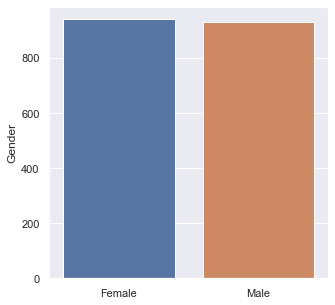

In [111]:
# Gender split of churners

sns.barplot(y = churners['Gender'].value_counts(), x = churners['Gender'].value_counts().index)
plt.show()

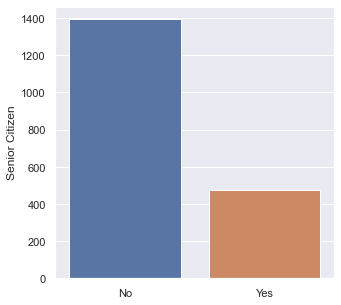

In [112]:
# Age split of churners (senior citizen or not)

sns.barplot(y = churners['Senior Citizen'].value_counts(), x = churners['Senior Citizen'].value_counts().index)
plt.show()

In [113]:
# Creating dataframe of Senior Citizens

senior_citizens = df[df['Senior Citizen'] =='Yes']

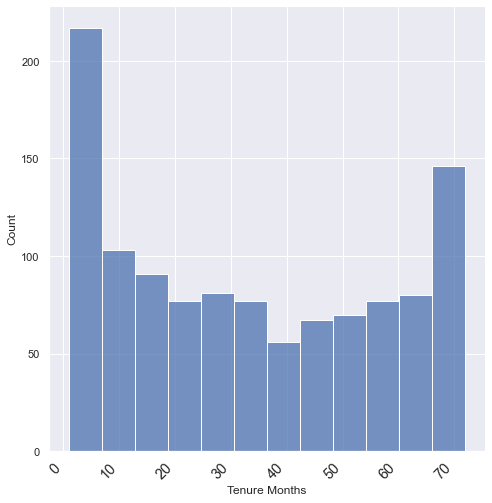

In [114]:
# Plotting tenure months for senior citizens - exploring whether this group has more loyalty, and therefore are less likely to churn

sns.displot(senior_citizens['Tenure Months'], height=7)
sns.set(rc={'figure.figsize':(15.0,15.0)})
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
plt.show()

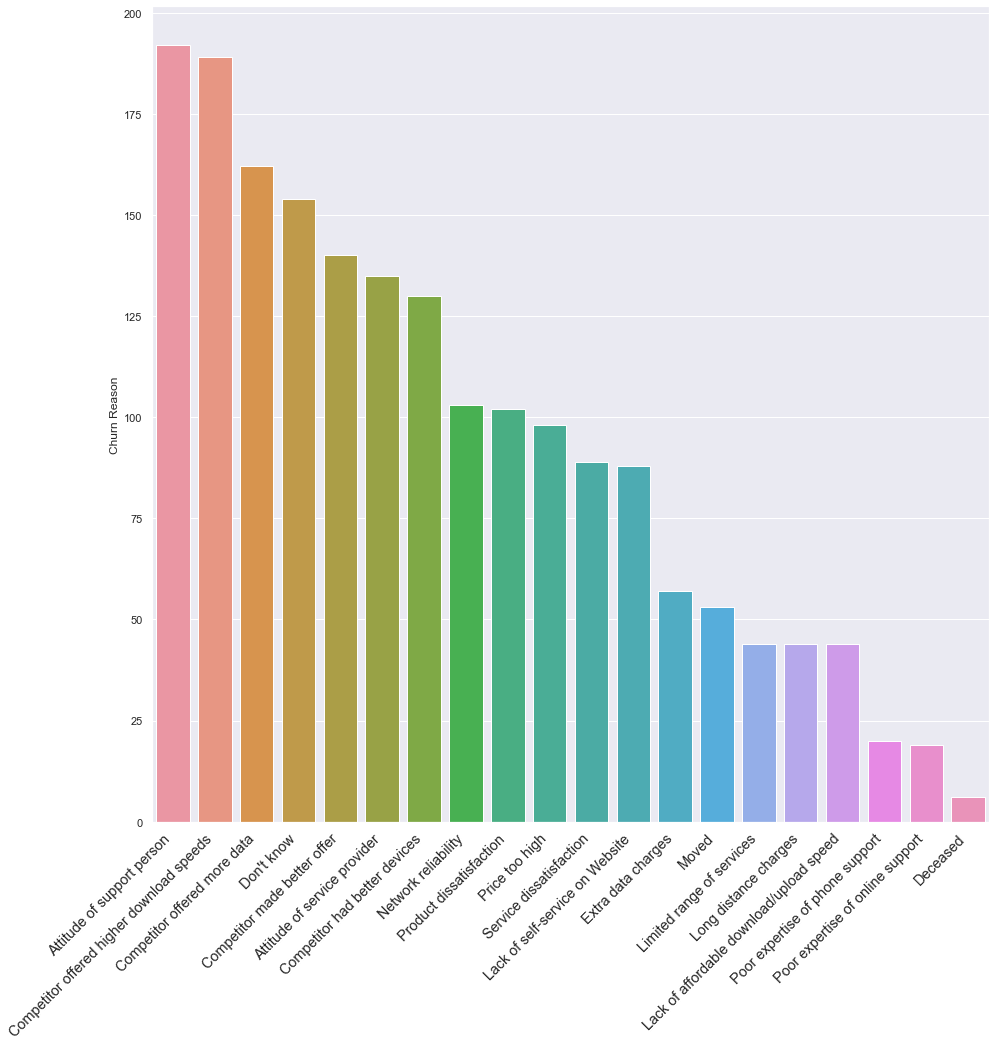

In [115]:
# Reason for churning given by churners

sns.barplot(y = churners['Churn Reason'].value_counts(), x = churners['Churn Reason'].value_counts().index)
sns.set(rc={'figure.figsize':(15.0,15.0)})
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
plt.show()

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

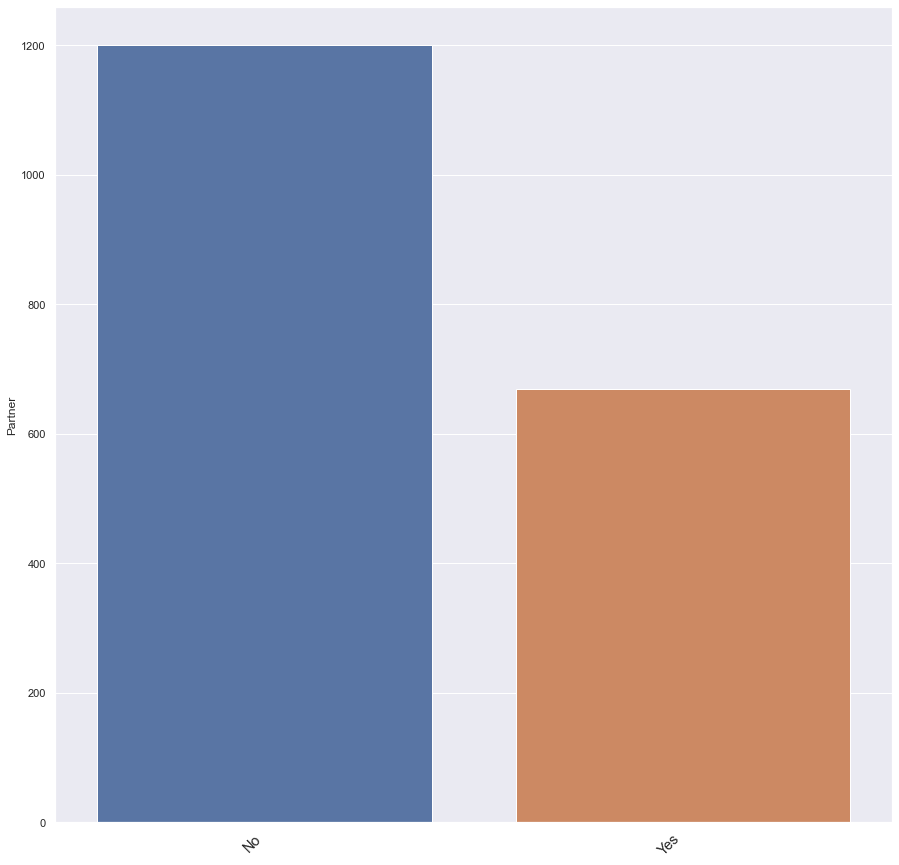

In [116]:
# Plot of partners in churners

sns.barplot(y = churners['Partner'].value_counts(), x = churners['Partner'].value_counts().index)
sns.set(rc={'figure.figsize':(5.0,5.0)})
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
#plt.show()

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

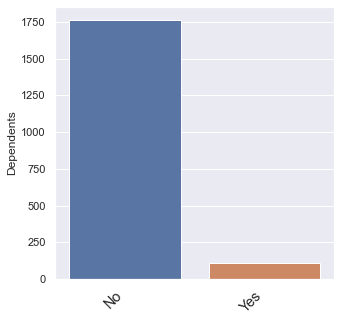

In [117]:
# Plot of dependents in churners

sns.barplot(y = churners['Dependents'].value_counts(), x = churners['Dependents'].value_counts().index)
sns.set(rc={'figure.figsize':(5.0,5.0)})
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
#plt.show()

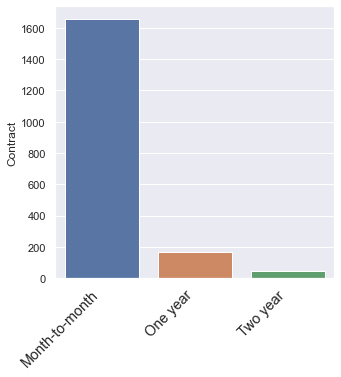

In [118]:
# Plot of contract type for churners
# results as expected - rolling contracts easier to cancel, and often have lower cancellation fees / repercussions for leaving early

sns.barplot(y = churners['Contract'].value_counts(), x = churners['Contract'].value_counts().index)
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
plt.show()

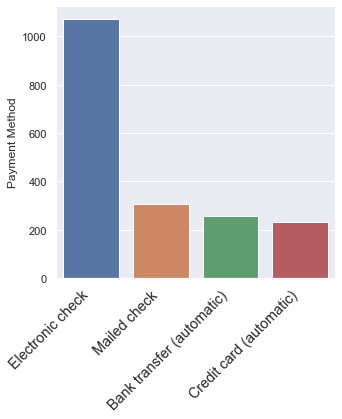

In [119]:
# Plot of payment method for churners

sns.barplot(y = churners['Payment Method'].value_counts(), x = churners['Payment Method'].value_counts().index)
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
plt.show()

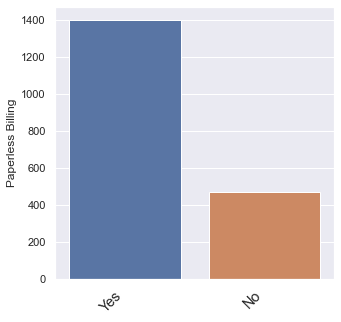

In [120]:
# Plot of whether churners had paperless billing or not

sns.barplot(y = churners['Paperless Billing'].value_counts(), x = churners['Paperless Billing'].value_counts().index)
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
plt.show()

# Summary of Additional Products for Churners and Non Churners

In [121]:
# creating additional column with counts of each internet product per row / customer
# internet service not included as it is assumed a 'no' for internet service will be a 'no' for all additional services
df_copy = df.copy()
df_copy['Number_AdditionalServices'] = (df_copy[['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']] == 'Yes').sum(axis=1)

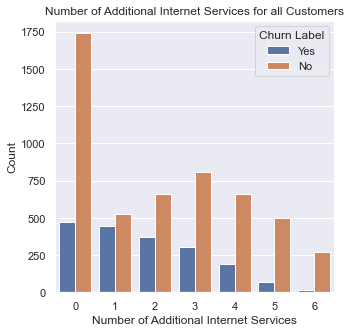

In [122]:
# plotting the new column and counts

figservices = sns.countplot(x=df_copy['Number_AdditionalServices'], hue='Churn Label', data=df_copy)
plt.xlabel("Number of Additional Internet Services")
plt.ylabel("Count")
plt.title("Number of Additional Internet Services for all Customers")
plt.show(figservices)

# What products did the churners have?

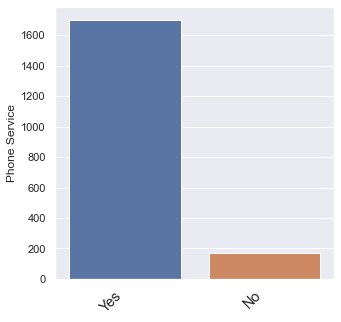

In [123]:
# Show if the churners had phone service or not

sns.barplot(y = churners['Phone Service'].value_counts(), x = churners['Phone Service'].value_counts().index)
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
plt.show()

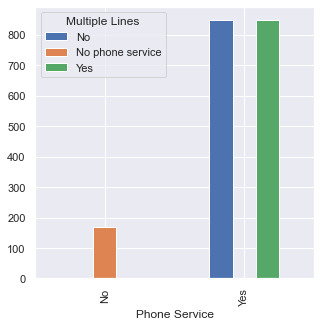

In [124]:
# Show if the churners had multiple lines or not

mulitplelinesusers = churners.groupby(['Phone Service','Multiple Lines']).count()['Count'].unstack().plot(kind="bar")

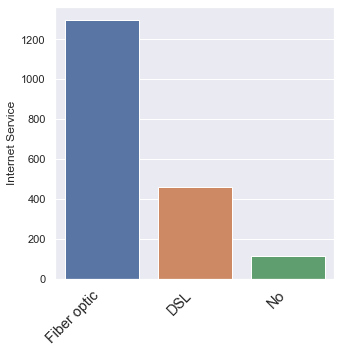

In [125]:
# Show if the churners had internet service or not

sns.barplot(y = churners['Internet Service'].value_counts(), x = churners['Internet Service'].value_counts().index)
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
plt.show()

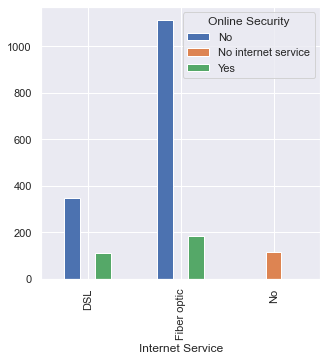

In [126]:
# Show if the churners had online security or not

onlinesecurityusers = churners.groupby(['Internet Service','Online Security']).count()['Count'].unstack().plot(kind="bar")

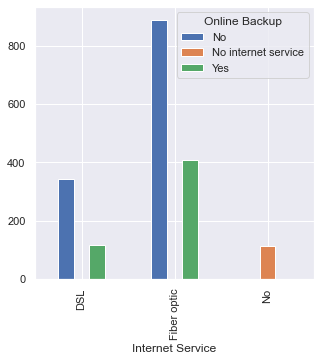

In [127]:
# Show if the churners had online back ups or not

onlinebackupusers = churners.groupby(['Internet Service','Online Backup']).count()['Count'].unstack().plot(kind="bar")

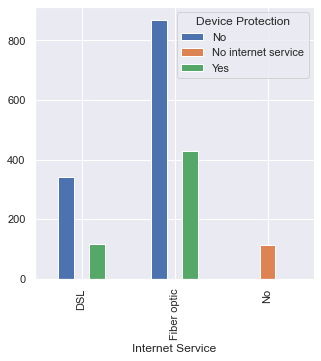

In [128]:
# Show if the churners had device protection or not

deviceprotectedusers = churners.groupby(['Internet Service','Device Protection']).count()['Count'].unstack().plot(kind="bar")

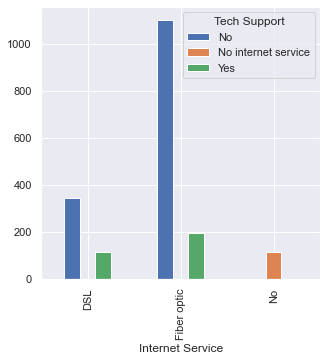

In [129]:
# Show if the churners had tech support or not

techsupportusers = churners.groupby(['Internet Service','Tech Support']).count()['Count'].unstack().plot(kind="bar")

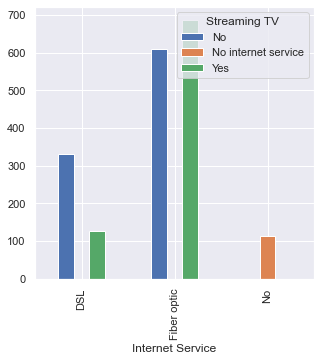

In [130]:
# Show if the churners had streaming tv or not

tvsreamingusers = churners.groupby(['Internet Service','Streaming TV']).count()['Count'].unstack().plot(kind="bar")

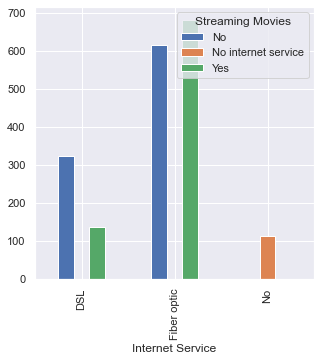

In [131]:
# Show if the churners had streaming movies or not

moviestreamingusers = churners.groupby(['Internet Service', 'Streaming Movies']).count()['Count'].unstack().plot(
    kind="bar")

# What products did the non churners have?

In [132]:
# Creating a dataframe of the non churners

nonchurners = df[df['Churn Value'] == 0].copy()

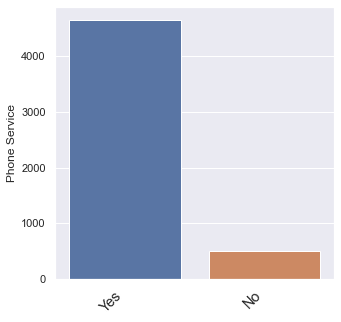

In [133]:
# Show if the non churners have phone service or not

sns.barplot(y = nonchurners['Phone Service'].value_counts(), x = nonchurners['Phone Service'].value_counts().index)
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
plt.show()

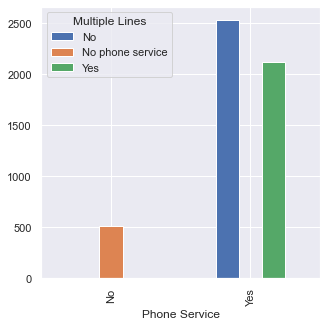

In [134]:
# Show if the non churners have multiple lines or not

mulitplelinesusers = nonchurners.groupby(['Phone Service','Multiple Lines']).count()['Count'].unstack().plot(kind="bar")

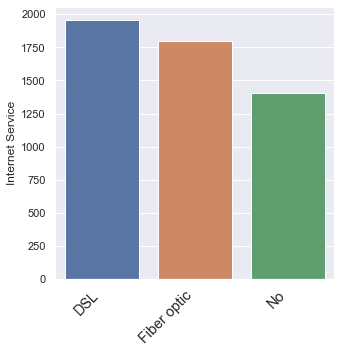

In [135]:
# Show if the non churners have internet service or not

sns.barplot(y = nonchurners['Internet Service'].value_counts(), x = nonchurners['Internet Service'].value_counts().index)
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
plt.show()

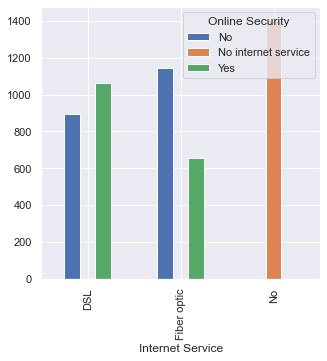

In [136]:
# Show if the non churners have online security or not

onlinesecurityusers = nonchurners.groupby(['Internet Service','Online Security']).count()['Count'].unstack().plot(kind="bar")

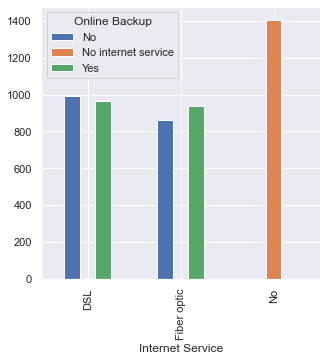

In [137]:
# Show if the non churners have online back ups or not

onlinebackupusers = nonchurners.groupby(['Internet Service','Online Backup']).count()['Count'].unstack().plot(kind="bar")

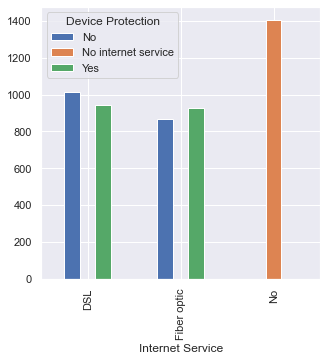

In [138]:
# Show if the non churners have device protection or not

deviceprotectedusers = nonchurners.groupby(['Internet Service','Device Protection']).count()['Count'].unstack().plot(kind="bar")

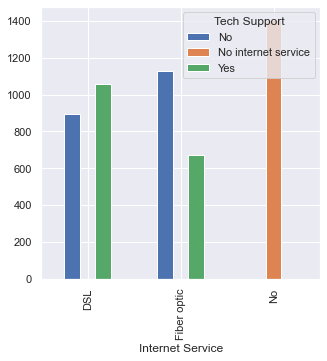

In [139]:
# Show if the non hurners have tech support or not

techsupportusers = nonchurners.groupby(['Internet Service', 'Tech Support']).count()['Count'].unstack().plot(kind="bar")

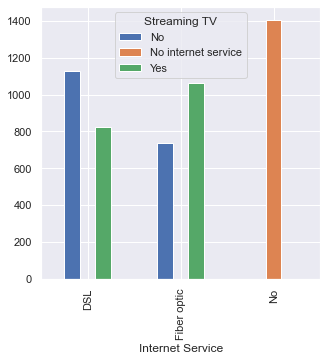

In [140]:
# Show if the non churners have streaming tv or not

tvsreamingusers = nonchurners.groupby(['Internet Service','Streaming TV']).count()['Count'].unstack().plot(kind="bar")

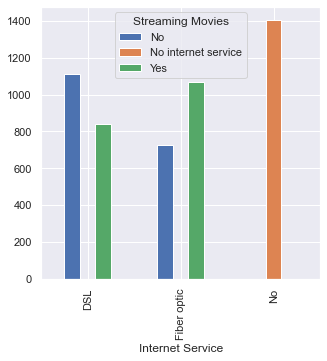

In [141]:
# Show if the non churners have streaming movies or not

moviestreamingusers = nonchurners.groupby(['Internet Service', 'Streaming Movies']).count()['Count'].unstack().plot(
    kind="bar")

# Exploring 'Loyal' Customers

 - Looking at loyal customers who are non-churners
 - See what products they have and what may be used as an incentive to not churn
 - Classing 'loyal' customers as those who have been with the company for 55 or more months

In [142]:
# Creating dataframe of loyal customers

loyalcustomers = nonchurners[nonchurners['Tenure Months'] >= 55].copy()

In [143]:
# Based on the above criteria, we can say there are 1674 loyal customers

len(loyalcustomers)

1674

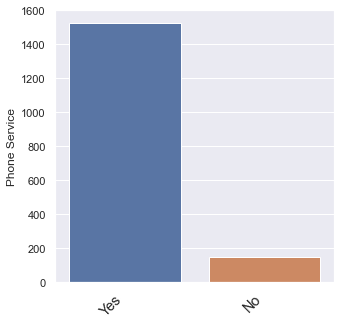

In [144]:
# Show if they had phone service or not

sns.barplot(y=loyalcustomers['Phone Service'].value_counts(), x=loyalcustomers['Phone Service'].value_counts().index)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')
plt.show()

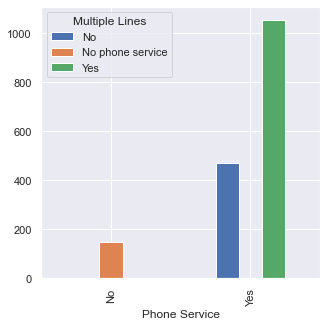

In [145]:
# Show if they had multiple lines or not

mulitplelinesusers = loyalcustomers.groupby(['Phone Service', 'Multiple Lines']).count()['Count'].unstack().plot(
    kind="bar")

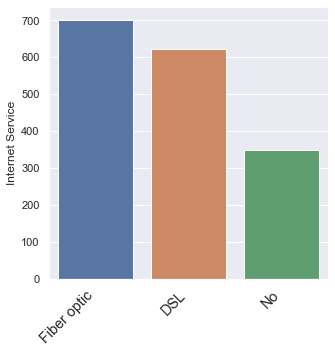

In [146]:
# Show if they have internet service or not

sns.barplot(y=loyalcustomers['Internet Service'].value_counts(),
            x=loyalcustomers['Internet Service'].value_counts().index)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')
plt.show()

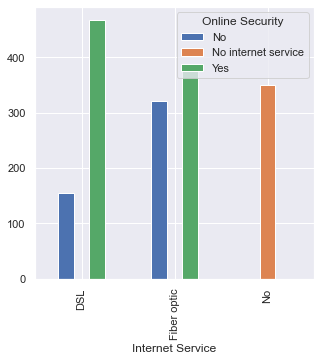

In [147]:
# Show if they had online security or not

onlinesecurityusers = loyalcustomers.groupby(['Internet Service', 'Online Security']).count()['Count'].unstack().plot(
    kind="bar")

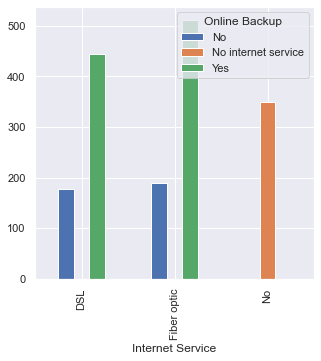

In [148]:
# Show if they had online back ups or not

onlinebackupusers = loyalcustomers.groupby(['Internet Service', 'Online Backup']).count()['Count'].unstack().plot(
    kind="bar")

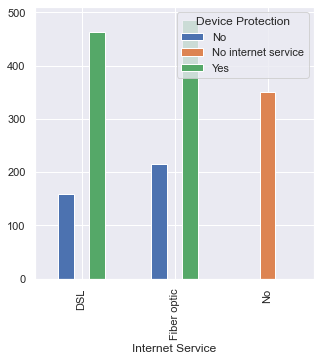

In [149]:
# Show if they had device protection or not

deviceprotectedusers = loyalcustomers.groupby(['Internet Service', 'Device Protection']).count()[
    'Count'].unstack().plot(
    kind="bar")

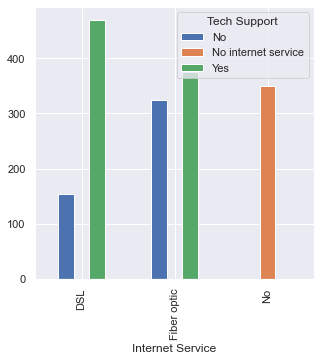

In [150]:
# Show if they had tech support or not

techsupportusers = loyalcustomers.groupby(['Internet Service', 'Tech Support']).count()['Count'].unstack().plot(
    kind="bar")

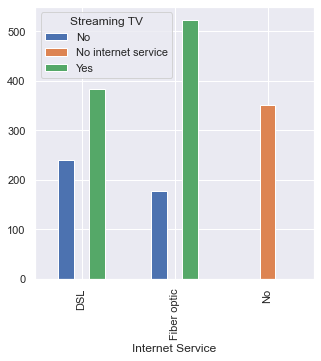

In [151]:
# Show if they had streaming tv or not

tvsreamingusers = loyalcustomers.groupby(['Internet Service', 'Streaming TV']).count()['Count'].unstack().plot(
    kind="bar")

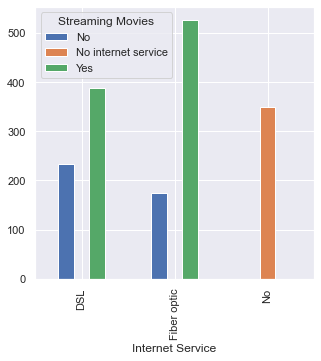

In [152]:
# Show if they had streaming movies or not

moviestreamingusers = loyalcustomers.groupby(['Internet Service', 'Streaming Movies']).count()['Count'].unstack().plot(
    kind="bar")

# Correlations

In [153]:
# This is a data cleaned data frame specifically used to see correlations between features

dfcorrs = df.copy()
dfcorrs = dfcorrs.drop(columns= ['Count', 'Country', 'State', 'City'])

In [154]:
# Mapping data to numeric values to allow correlations to be observed

universal_dict = { 'No internet service' : '0', 'No phone service' : '0', 'No' : '1', 'Yes' : '2'}

In [155]:
cols = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup','Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing']
for i in cols:
    dfcorrs[i] = dfcorrs[i].map(universal_dict)
    dfcorrs[i] = dfcorrs[i].astype(int) # Converts the types from obj to int

In [156]:
# Ensuring mapping worked as intended

dfcorrs.head()

,CustomerID,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,1,1,1,2,...,1,1,Month-to-month,2,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,1,1,2,2,...,1,1,Month-to-month,2,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,1,1,2,8,...,2,2,Month-to-month,2,Electronic check,99.65,820.50,Yes,1,Moved
3,7892-POOKP,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,1,2,2,28,...,2,2,Month-to-month,2,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,1,1,2,49,...,2,2,Month-to-month,2,Bank transfer (automatic),103.70,5036.30,Yes,1,Competitor had better devices


In [157]:
# Ensuring mapping worked as intended

dfcorrs.dtypes

CustomerID            object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen         int32
Partner                int32
Dependents             int32
Tenure Months          int64
Phone Service          int32
Multiple Lines         int32
Internet Service      object
Online Security        int32
Online Backup          int32
Device Protection      int32
Tech Support           int32
Streaming TV           int32
Streaming Movies       int32
Contract              object
Paperless Billing      int32
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [158]:
# creating a table with correlation values

dfcorrs.corr()

,Zip Code,Latitude,Longitude,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Value
Zip Code,1.000000,0.895795,-0.784273,-0.006895,-0.006344,0.009995,0.000287,-0.004880,-0.015960,-0.004665,-0.009516,-0.002834,0.000492,-0.003081,-0.004084,-0.011599,-0.004956,-0.001462,0.003006
Latitude,0.895795,1.000000,-0.876777,-0.010592,-0.007864,0.018755,-0.002100,-0.013034,-0.024804,-0.013845,-0.015403,-0.013418,-0.009710,-0.013429,-0.015204,-0.018159,-0.020302,-0.010313,-0.003600
Longitude,-0.784273,-0.876777,1.000000,0.008890,0.008300,-0.014508,-0.001477,0.013717,0.023805,0.015799,0.026928,0.021649,0.012669,0.026378,0.019675,0.020974,0.024513,0.009047,0.004693
Senior Citizen,-0.006895,-0.010592,0.008890,1.000000,0.016957,-0.174064,0.015683,0.008392,0.113769,0.081766,0.144762,0.140226,0.067318,0.167123,0.176125,0.156258,0.219874,0.102411,0.150541
Partner,-0.006344,-0.007864,0.008300,0.016957,1.000000,0.363166,0.381912,0.018397,0.118037,0.092034,0.091536,0.099077,0.077252,0.080205,0.076076,-0.013957,0.097825,0.319072,-0.149982
Dependents,0.009995,0.018755,-0.014508,-0.174064,0.363166,1.000000,0.133773,-0.000394,-0.022007,-0.066556,-0.092681,-0.108952,-0.080556,-0.129263,-0.138968,-0.118369,-0.142926,0.032184,-0.248140
Tenure Months,0.000287,-0.002100,-0.001477,0.015683,0.381912,0.133773,1.000000,0.007877,0.259112,0.232295,0.253575,0.253834,0.230429,0.200646,0.203834,0.004823,0.246862,0.825880,-0.354049
Phone Service,-0.004880,-0.013034,0.013717,0.008392,0.018397,-0.000394,0.007877,1.000000,0.674824,-0.158997,-0.129432,-0.141055,-0.160950,-0.107242,-0.114798,0.016696,0.248033,0.113008,0.011691
Multiple Lines,-0.015960,-0.024804,0.023805,0.113769,0.118037,-0.022007,0.259112,0.674824,1.000000,0.069959,0.130978,0.125447,0.069706,0.166256,0.163218,0.133538,0.491412,0.412495,0.036148
Online Security,-0.004665,-0.013845,0.015799,0.081766,0.092034,-0.066556,0.232295,-0.158997,0.069959,1.000000,0.704598,0.701112,0.734696,0.661541,0.666682,0.184449,0.635260,0.483157,0.023014


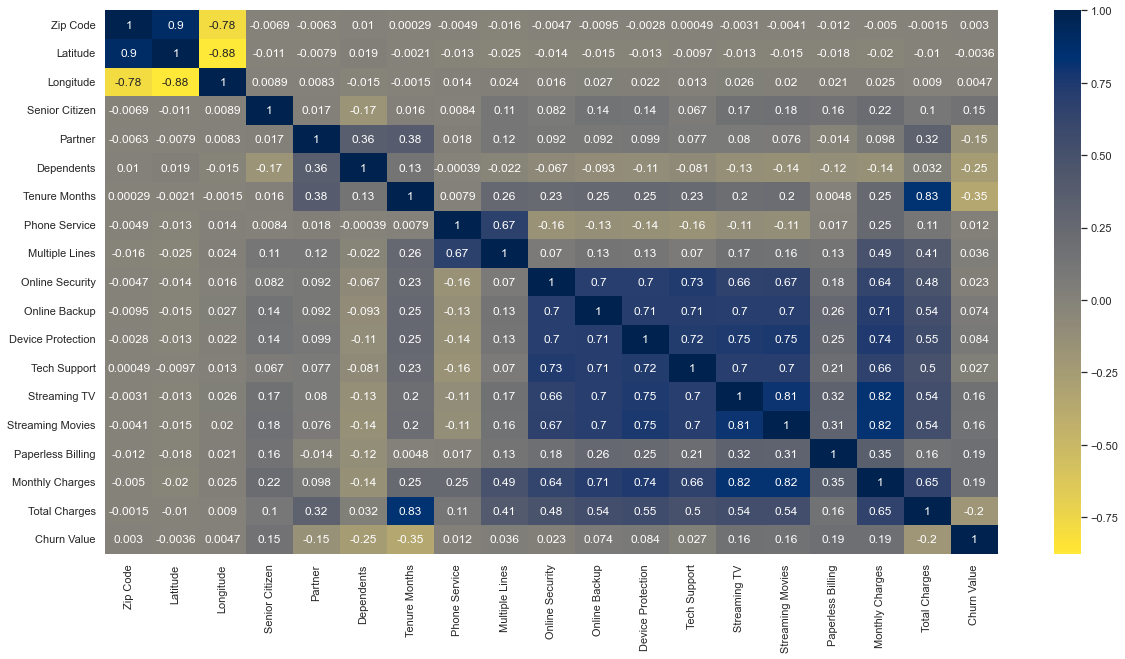

In [159]:
# creating a heat map of correlations to highlight notable correlations and visualise correlations more clearly

fig = plt.figure(figsize=(20,10))
sns.heatmap(dfcorrs.corr(),annot=True,cmap = 'cividis_r' ,fmt=".2g")
plt.show()

# Saving clean data in preparation for modelling

In [160]:
# Save this dataframe into a csv file to use for modelling file
df.to_csv('cleaned.csv', index=False)